<html>
<body>
<div align="center">
<h3>Prepared by Omar Mahmoud</h3>
    
<h1>Prediction using Unsupervised Machine Learning</h1>

<h6>Unsupervised machine learning is a powerful technique that can be used to gain insights and make predictions from unlabeled data. However, it's important to note that the results of unsupervised learning may be more difficult to interpret and evaluate than supervised learning, as there is no explicit ground truth to compare against.</h6>

<h3><a href="https://www.linkedin.com/in/omar-mahmoud-5bb616175/">LinkedIn</a>&nbsp; <a href="https://twitter.com/OmarMah25544092">Twitter</a>&nbsp; <a href="https://www.instagram.com/3amory99/">Instagram</a>&nbsp; <a href="https://www.facebook.com/Mora898/">Facebook</a></h3>
</div>

</div>
</body>
</html>

## Import Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The dataset consists of three different species of Iris flowers, with 50 samples each. This implies that the dataset is balanced, which is important for training and evaluating machine learning models.

## Missing values in data

In [14]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It indicates that there are no missing values in the given dataset. This means that for each of the six columns in the dataset (Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species), all the rows have a value present.

## Duplication in data

In [15]:
df.duplicated().sum()

0

It indicates that there are no duplicated rows in the given dataset. This means that each row in the dataset is unique and there are no exact duplicates of any row in the dataset.

In [16]:
df.groupby(['Species'])[['SepalLengthCm','SepalWidthCm','PetalLengthCm']].sum()

,SepalLengthCm,SepalWidthCm,PetalLengthCm
Species,,,
Iris-setosa,250.3,170.9,73.2
Iris-versicolor,296.8,138.5,213.0
Iris-virginica,329.4,148.7,277.6


## Finding the optimum number of clusters for k-means classification

In [26]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


# x represent Id	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
x = df.iloc[:,[0,1,2,3]].values

In [27]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Line Graph Plotting

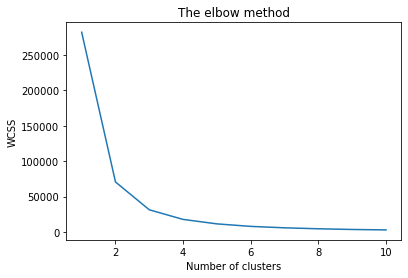

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Applying kmeans to The Iris Dataset  
#### Creating the kmeans classifier

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters

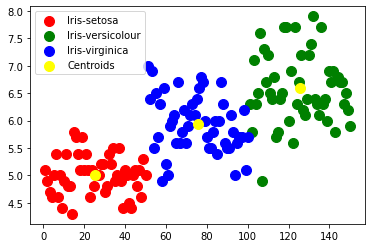

In [35]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## That's great! Thanks Sparks Foundation✨